# Ejercicio 6

Implementar un detector de color YELLOW que funciones en tiempo real en un video. Para ello, implementar el algoritmo en OpenCV, de modo que capture las imágenes directamente de la cámara de su PC, y que muestre el resultado de la detección en tiempo real en pantalla. Si usted lo desea, puede diseñar el detector para que detecte otros colores diferentes. Mostrar en su informe, resultados (screenshots) del funcionamiento de su detector.

## Librerias

In [9]:
import cv2 as cv
import numpy as np
from PIL import Image

## Generador de Límites

In [10]:
def get_limits(color, delta):
    """
    Obtener los límites de un color en el espacio HSV

    Args:
        color (list): color en BGR
        delta (int): margen de error

    Returns:
        np.array: color en HSV
        np.array: límite inferior
        np.array: límite superior
    """
    # Convertir el color a HSV
    rgb_color = np.uint8([[color]])
    hsv_color = cv.cvtColor(rgb_color, cv.COLOR_BGR2HSV)

    # Definir los limites del color en HSV
    h_value = int(hsv_color[0][0][0])
    min_limit = np.array([max(h_value - delta, 0), 100, 100], dtype=np.uint8)
    max_limit = np.array([min(h_value + delta, 179), 255, 255], dtype=np.uint8)

    return min_limit, max_limit

## Captura de Video y detección de color

In [11]:
# Definir el color BGR
YELLOW = [0, 255, 255]

In [12]:
# Inicializar la captura de video
webcam = cv.VideoCapture(0)

# Iniciar el bucle para capturar frames
while True:
    # Leer un frame de la captura
    ret, frame = webcam.read()
    
    # Convertir el frame a HSV para analizar los colores
    hsv_frame = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
    # Obtener los límites del color amarillo
    yellow_min, yellow_max = get_limits(YELLOW, 15)

    # Generar una máscara para el color amarillo
    mask = cv.inRange(hsv_frame, yellow_min, yellow_max)
    mask_ = Image.fromarray(mask)
    # Encontrar los contornos de la máscara
    bbox = mask_.getbbox()

    # Dibujar un rectángulo en el frame
    if bbox is not None:
        x1, y1, x2, y2 = bbox
        cv.rectangle(frame, (x1, y1), (x2, y2), YELLOW, 5)
        cv.putText(frame, 'Yellow', (x1, y1 - 10), cv.FONT_HERSHEY_SIMPLEX, 0.9, YELLOW, 2)

    # Mostrar el frame
    cv.imshow('Webcam', frame)

    # Salir del bucle si se presiona la tecla 'q'
    if cv.waitKey(1) & 0xFF == ord('q'):
        break

# Liberar la captura de video y cerrar las ventanas
webcam.release()
cv.destroyAllWindows()

## Screenshots

![Captura de pantalla 2025-02-11 165121.png](<attachment:Captura de pantalla 2025-02-11 165121.png>)
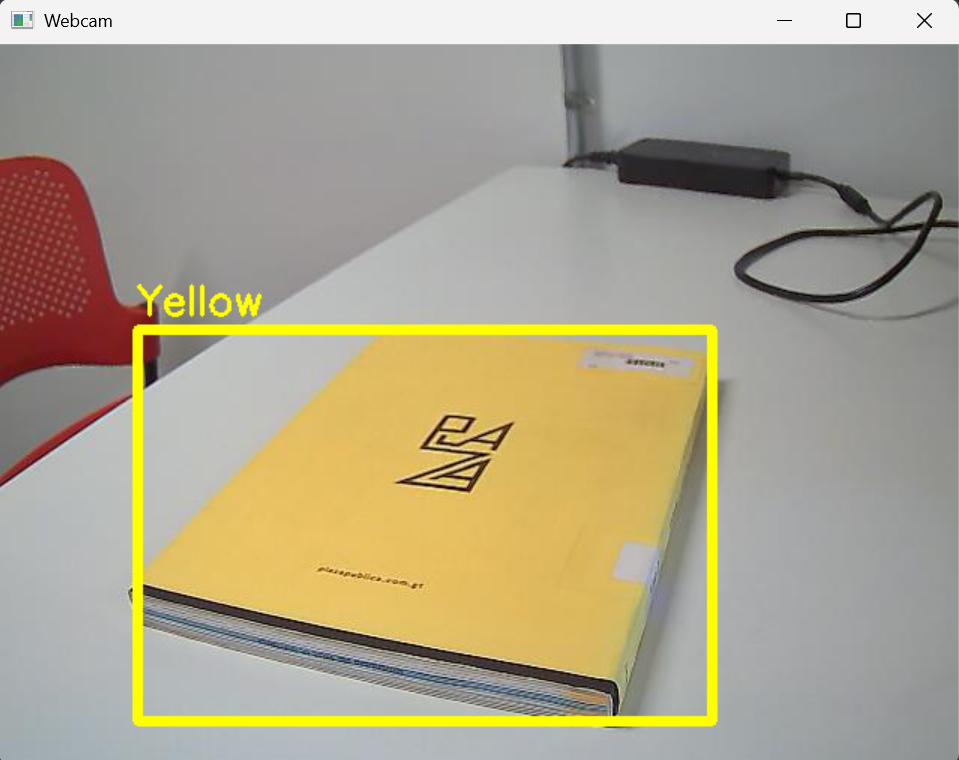

![Captura de pantalla 2025-02-11 165239.png](<attachment:Captura de pantalla 2025-02-11 165239.png>)
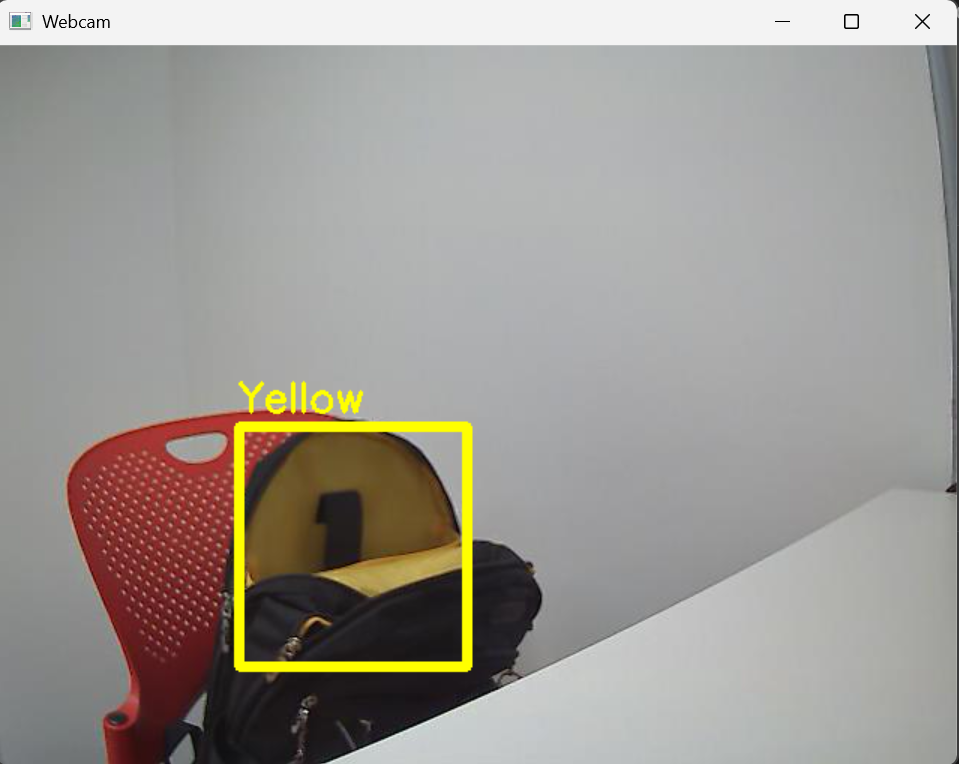

![Captura de pantalla 2025-02-11 165701.png](<attachment:Captura de pantalla 2025-02-11 165701.png>)
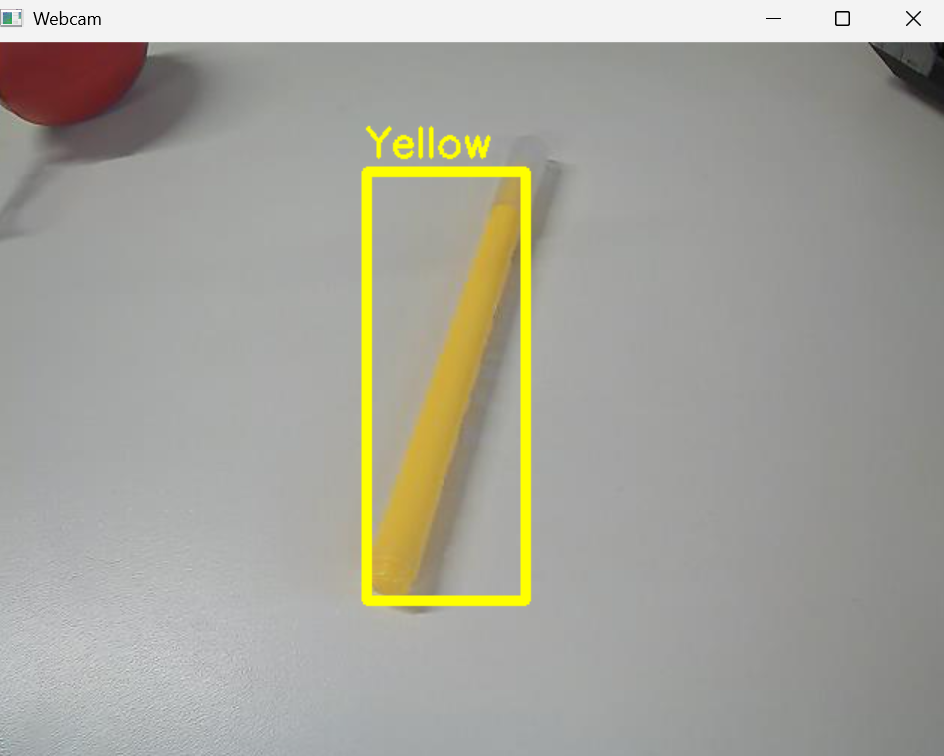